# Red Neuronal Profunda (DNN) para clasificación MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven. 

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

## Plan de Acción para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activación
3.  Fijar los optimizadores avanzados y la función de pérdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos acá.  Viene con el módulo **"tensorflow.keras.datasets"**. 

In [91]:
import numpy as np
import tensorflow as tf

La siguiente instrucción, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el parámetro path, relativo a  ~/.keras/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta más de una vez, ya no descarga el archivo.

In [92]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [93]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qué no...podemos utilizar la instrucción **assert**

In [94]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta sección es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validación, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tamaño que el conjunto de prueba

In [95]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [96]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea numéricamente más estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una función, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [97]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validación.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tamaño de los datos de prueba.

In [98]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validación.

Nuestros datos de validación serán 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tamaño de tanda igual al total de muestras de validación.

In [99]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los demás por lo que nos salteamos tantas observaciones como las hay en el conjunto de validación.

In [100]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [101]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [102]:
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validación y prueba, no se necesita barajearlos

In [103]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realización del mismo.  Asi que esta vez, hagámoslo.  :)

In [104]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [105]:
tamanio_capa_escondida = 300 # El ajuste se dejó en 300 ya que este fue el que obtuvo mayor precisión que los demás.

# Definimos cómo se verá el modelo

La primera capa (la de entrada):  cada observación es de 28x28 píxeles, por lo tanto es un tensor de rango 2.

Como aún no hemos aprendido sobre CNNs, no sabemos como alimentar este tipo de entrada a nuestra red, por lo tanto hay que "aplanar" las imágenes.  Hay un método conveniente **Flatten** que toma nuestro tensor de 28x28 y lo convierte en  un vector (None,) o (784,)...porque 28x28 = 784.  Esto nos permite crear una red de alimentación hacia adelante.

    
**tf.keras.layers.Dense** básicamente implementa:  *salida = activation(dot(entrada, peso) + sesgo)*.  Requiere varios argumentos, pero los más importantes para nosotros son el ancho de la capa escondida y la función de activación.

La capa final no es diferente, solo nos aseguramos de activarla con **softmax**


In [106]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(256, activation='relu', 
                         kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(128, activation='tanh',
                         kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

/Users/josepereira/Documents/GitHub/Lab2-DT/env/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Seleccionar el optimizador y la función de pérdida

Definimos el optimizador que nos gustaría utilizar, la función de pérdida, y las métricas que nos interesa obtener en cada interacción

In [107]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

In [108]:
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          # Modificación del batch
          batch_size = 1,
          verbose = 2)

Epoch 1/5
500/500 - 2s - 4ms/step - accuracy: 0.7595 - loss: 1.5092 - val_accuracy: 0.8702 - val_loss: 0.9807
Epoch 2/5
500/500 - 2s - 3ms/step - accuracy: 0.7473 - loss: 1.2018 - val_accuracy: 0.8830 - val_loss: 0.7831
Epoch 3/5
500/500 - 1s - 2ms/step - accuracy: 0.7313 - loss: 1.1963 - val_accuracy: 0.8528 - val_loss: 0.9037
Epoch 4/5
500/500 - 1s - 2ms/step - accuracy: 0.7256 - loss: 1.1866 - val_accuracy: 0.8053 - val_loss: 0.8900
Epoch 5/5
500/500 - 1s - 3ms/step - accuracy: 0.7330 - loss: 1.1603 - val_accuracy: 0.8157 - val_loss: 0.8497


## Probar el modelo

Como se discutió en clase, luego del entrenamiento (con los datos de entrenamiento), y la validación (con los datos de validación), probamos el potencial de predicción final de nuestro modelo con el conjunto de datos de prueba que el algoritmo NUNCA ha visto antes.

Es muy importante reconocer que estar "jugando" con los hiperparámetros sobre-ajusta el conjunto de datos de validación.

La prueba es la instancia absolutamente final. **NUNCA** debe probarse el modelo antes de haber completamente ajustado el mismo.

Si se ajusta el modelo después de hacer la prueba, se empezará a sobre-ajustar el conjunto de datos de prueba, que echaría "por los suelos" el propósito original del mismo.

In [109]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.7653 - loss: 1.7225


In [110]:
# Si se desea, se puede aplicar un formateo "bonito"
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 1.72. Precisión de prueba: 76.53%


Utilizando el modelo inicial y los hiperparámetros dados en este notebook, la precisión de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el código, se obtiene una precisión diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una solución subóptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.

--- 
### Gráfica de comparación de precisión
Validación y prueba

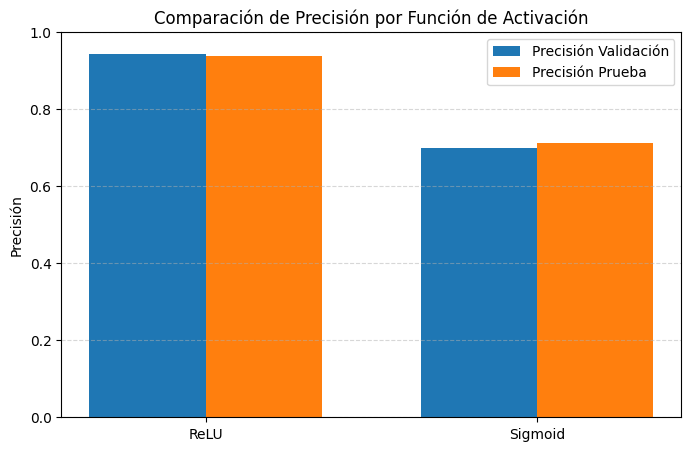

In [111]:
import matplotlib.pyplot as plt

activaciones = ['ReLU', 'Sigmoid']
val_accuracy = [0.9441, 0.6984]
test_accuracy = [0.9373, 0.7116]

x = range(len(activaciones))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, val_accuracy, width=width, label='Precisión Validación')
plt.bar([i + width for i in x], test_accuracy, width=width, label='Precisión Prueba')

plt.xticks([i + width / 2 for i in x], activaciones)
plt.ylim(0, 1)
plt.ylabel('Precisión')
plt.title('Comparación de Precisión por Función de Activación')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


---
### Gráfica de comparación de pérdida

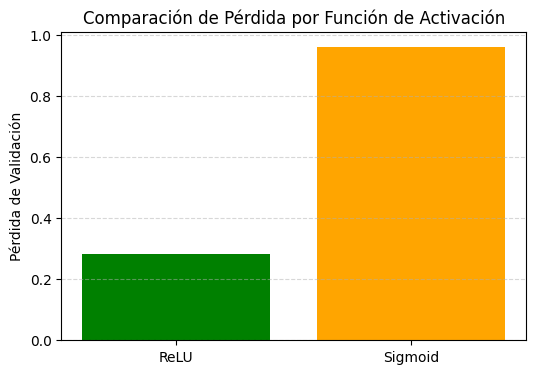

In [112]:
val_loss = [0.2817, 0.9614]

plt.figure(figsize=(6, 4))
plt.bar(activaciones, val_loss, color=['green', 'orange'])
plt.ylabel('Pérdida de Validación')
plt.title('Comparación de Pérdida por Función de Activación')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


--- 
### Gráfica de comparación de tiempo de entrenamiento

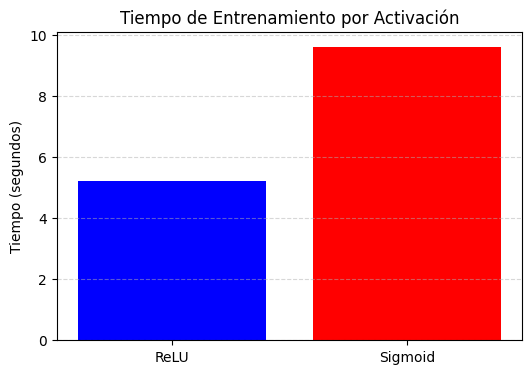

In [113]:
tiempo_entrenamiento = [5.2, 9.6]

plt.figure(figsize=(6, 4))
plt.bar(activaciones, tiempo_entrenamiento, color=['blue', 'red'])
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de Entrenamiento por Activación')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Epoch 1/5


/Users/josepereira/Documents/GitHub/Lab2-DT/env/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8863 - loss: 1.0696 - val_accuracy: 0.9445 - val_loss: 0.4662
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.4692 - val_accuracy: 0.9495 - val_loss: 0.3802
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9370 - loss: 0.4186 - val_accuracy: 0.9582 - val_loss: 0.3507
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9390 - loss: 0.4010 - val_accuracy: 0.9577 - val_loss: 0.3385
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9432 - loss: 0.3824 - val_accuracy: 0.9548 - val_loss: 0.3372
Modelo principal - Precisión: 0.9516
   Entrenando: Sin Regularización...
   Sin Regularización: Precisión=0.9765
   Entrenando: Solo Dropout...
   Solo Dropout: Precisión=0.9756
   Entrenando: Solo L2...
   Solo L2: Precisión=0.9442
   Dropout + L2 (Principal): Precisión=0.9516


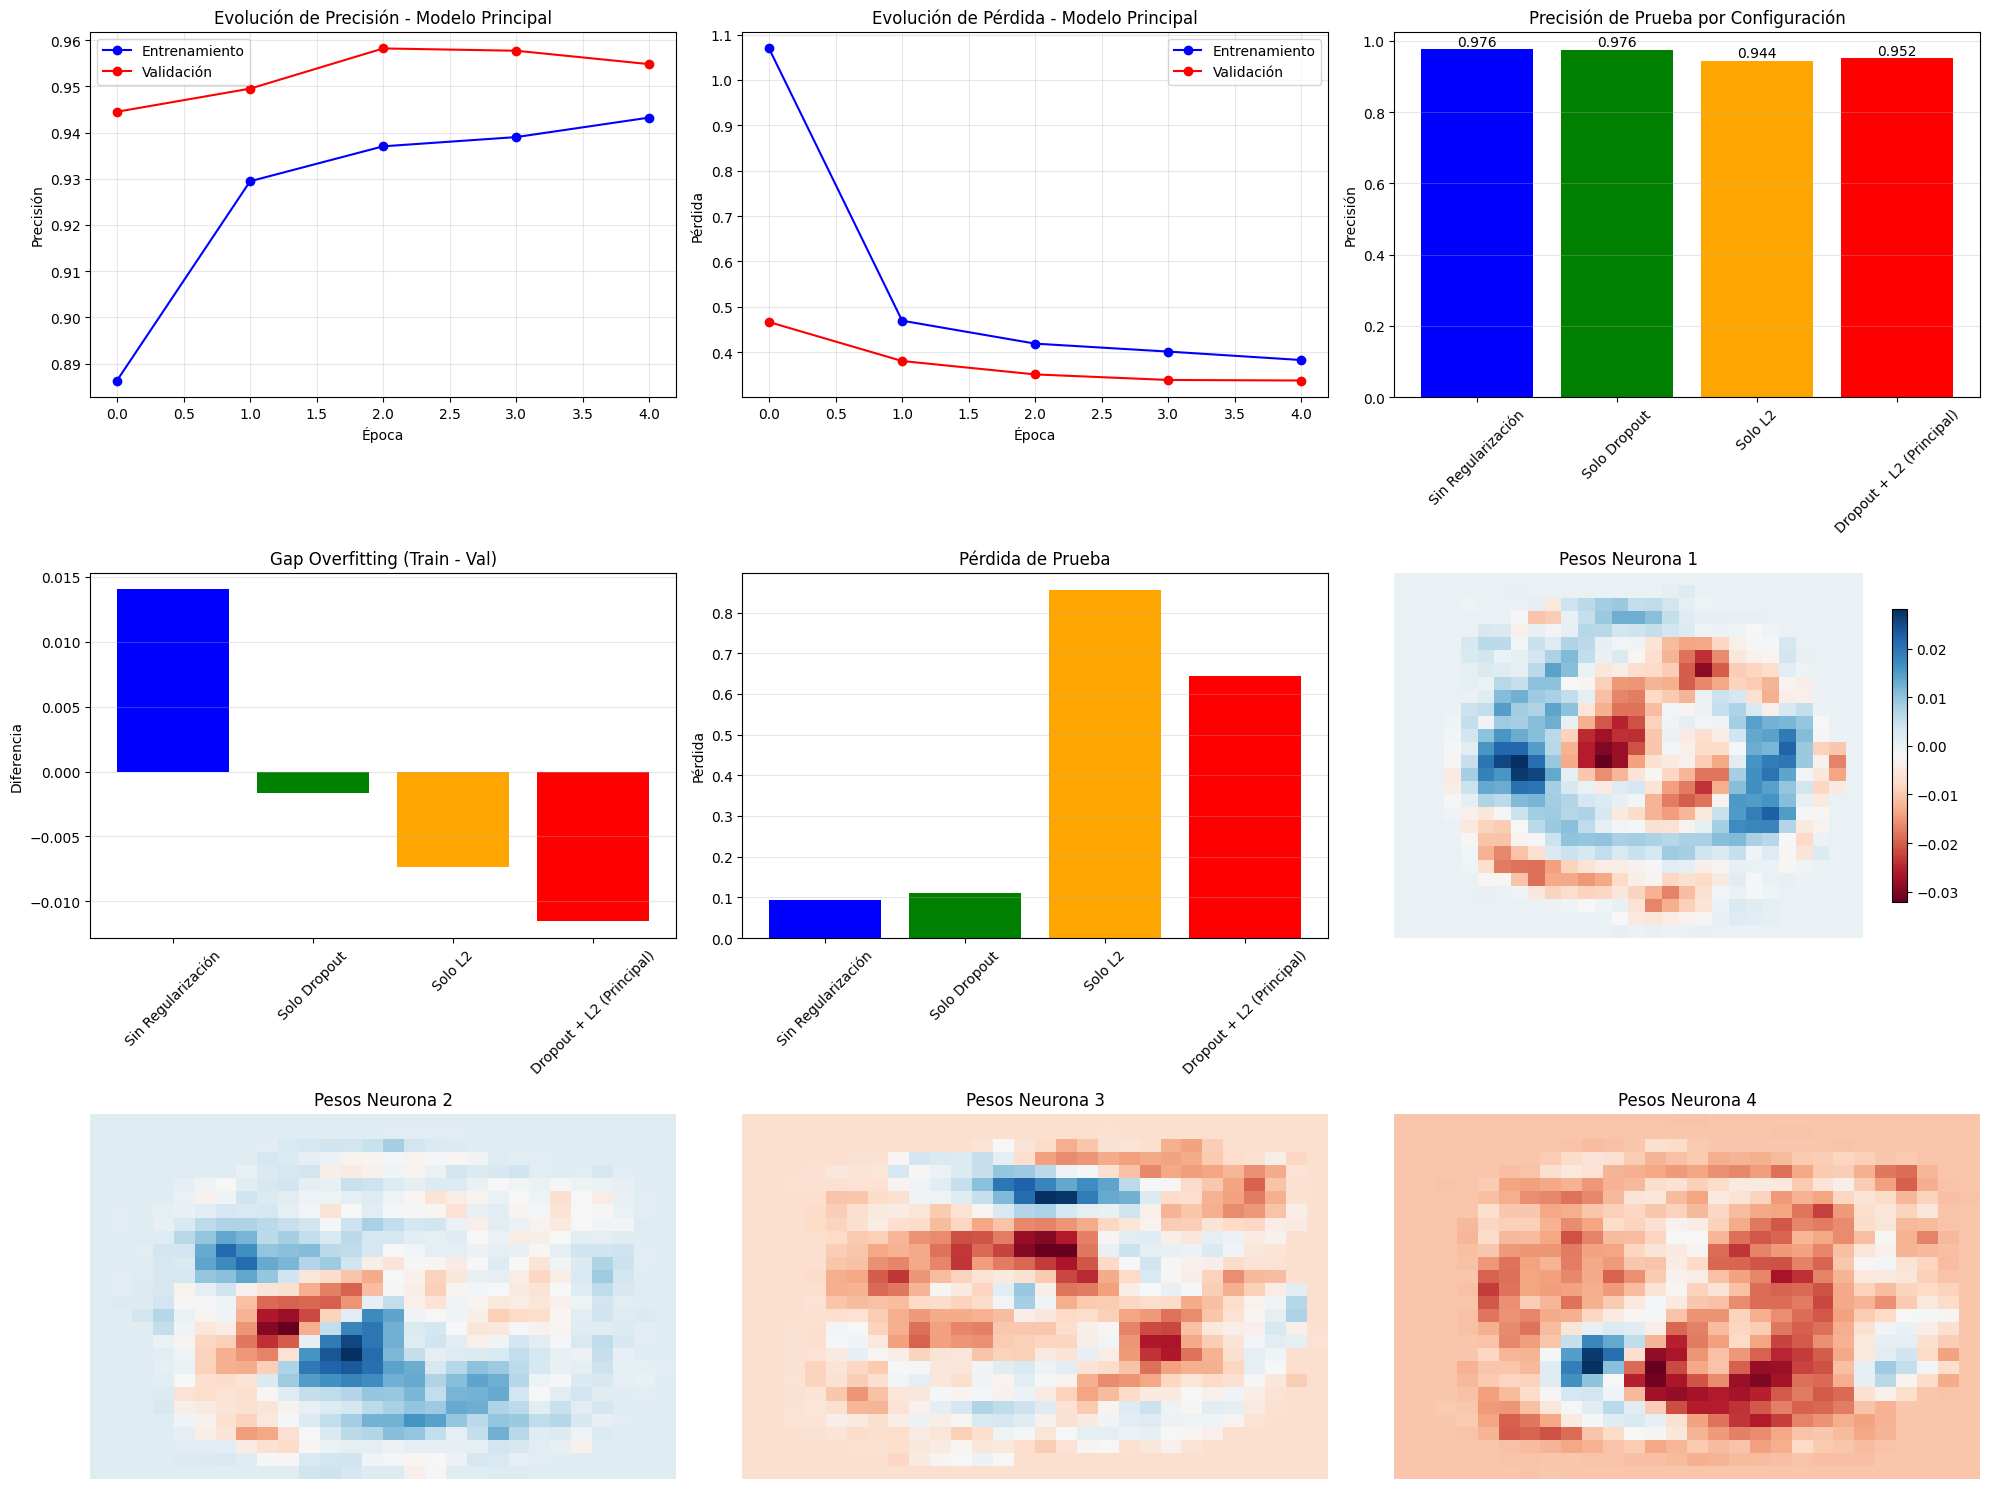

Configuración        Precisión  Gap Overfit  Pérdida    Tiempo(s) 
Sin Regularización   0.9765     0.0140       0.0937     6.1       
Solo Dropout         0.9756     -0.0016      0.1099     7.0       
Solo L2              0.9442     -0.0074      0.8549     6.6       
Dropout + L2 (Principal) 0.9516     -0.0116      0.6432     Usado     


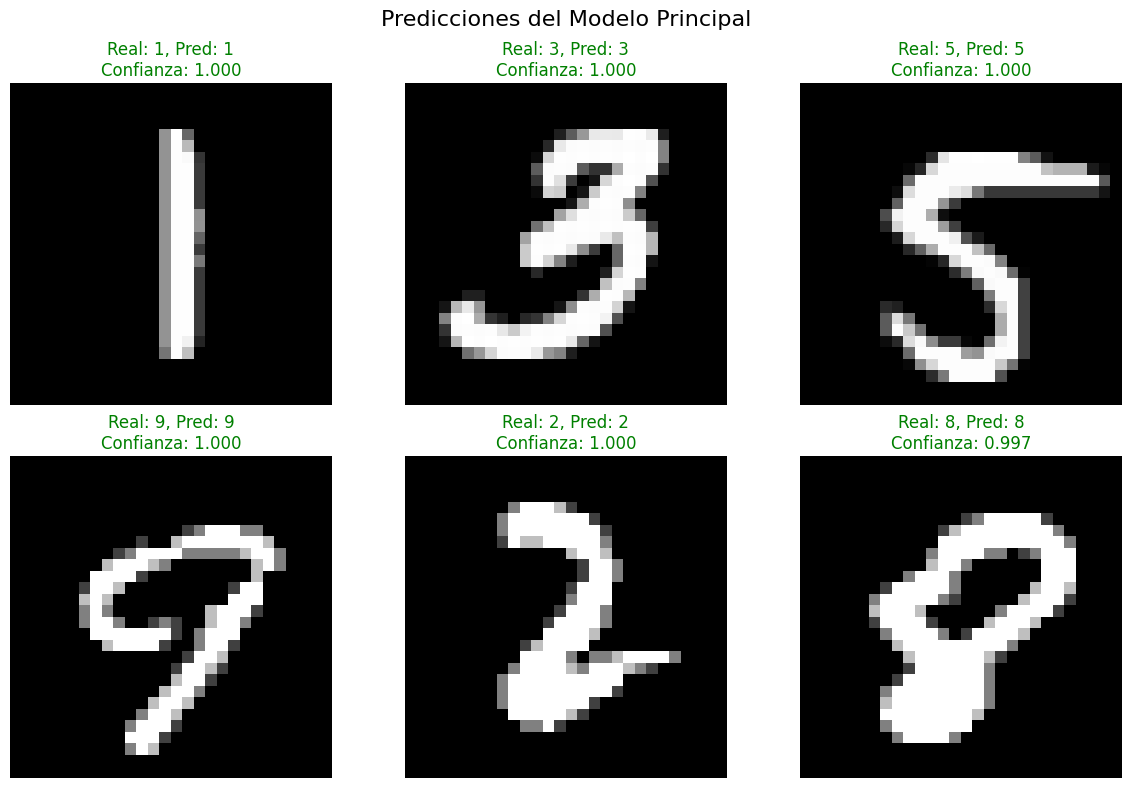

Precisión final entrenamiento: 0.9432
Precisión final validación:    0.9548
Precisión en datos de prueba:  0.9516
Pérdida en datos de prueba:    0.6432
Gap overfitting:               -0.0116

Mejor configuración (menor overfitting): Dropout + L2 (Principal)


In [114]:
import time
import numpy as np
import matplotlib.pyplot as plt

def analisis_completo_modelo():

    
    modelo_principal = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu', 
                             kernel_regularizer=tf.keras.regularizers.l2(0.005)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='tanh',
                             kernel_regularizer=tf.keras.regularizers.l2(0.005)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(tamanio_salida, activation='softmax')
    ])
    
    modelo_principal.compile(optimizer='adam', 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])
    
    historia_principal = modelo_principal.fit(datos_entreno,
                                            epochs=5,
                                            validation_data=datos_validacion,
                                            batch_size=100,
                                            verbose=1)
    
    perdida_prueba, precision_prueba = modelo_principal.evaluate(datos_prueba, verbose=0)
    print(f"Modelo principal - Precisión: {precision_prueba:.4f}")
    
    
    configuraciones = {
        'Sin Regularización': [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='tanh'),
            tf.keras.layers.Dense(tamanio_salida, activation='softmax')
        ],
        
        'Solo Dropout': [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(128, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(tamanio_salida, activation='softmax')
        ],
        
        'Solo L2': [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation='relu', 
                                 kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.Dense(128, activation='tanh',
                                 kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.Dense(tamanio_salida, activation='softmax')
        ],
        
        'Dropout + L2 (Principal)': 'MODELO_PRINCIPAL'  
    }
    
    resultados = []
    
    for nombre, capas in configuraciones.items():
        if nombre == 'Dropout + L2 (Principal)':
            resultado = {
                'nombre': nombre,
                'historia': historia_principal,
                'precision_prueba': precision_prueba,
                'perdida_prueba': perdida_prueba,
                'tiempo': 0,  # Ya entrenado
                'precision_val_final': historia_principal.history['val_accuracy'][-1],
                'gap_overfitting': historia_principal.history['accuracy'][-1] - historia_principal.history['val_accuracy'][-1]
            }
        else:
            print(f"   Entrenando: {nombre}...")
            modelo_temp = tf.keras.Sequential(capas)
            modelo_temp.compile(optimizer='adam', 
                               loss='sparse_categorical_crossentropy', 
                               metrics=['accuracy'])
            
            inicio = time.time()
            historia_temp = modelo_temp.fit(datos_entreno,
                                          epochs=5,
                                          validation_data=datos_validacion,
                                          batch_size=100,
                                          verbose=0)
            fin = time.time()
            
            perdida_temp, precision_temp = modelo_temp.evaluate(datos_prueba, verbose=0)
            
            resultado = {
                'nombre': nombre,
                'historia': historia_temp,
                'precision_prueba': precision_temp,
                'perdida_prueba': perdida_temp,
                'tiempo': fin - inicio,
                'precision_val_final': historia_temp.history['val_accuracy'][-1],
                'gap_overfitting': historia_temp.history['accuracy'][-1] - historia_temp.history['val_accuracy'][-1]
            }
        
        resultados.append(resultado)
        print(f"   {nombre}: Precisión={resultado['precision_prueba']:.4f}")
    

    
    fig = plt.figure(figsize=(20, 15))
    
    ax1 = plt.subplot(3, 3, 1)
    plt.plot(historia_principal.history['accuracy'], 'bo-', label='Entrenamiento')
    plt.plot(historia_principal.history['val_accuracy'], 'ro-', label='Validación')
    plt.title('Evolución de Precisión - Modelo Principal')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    ax2 = plt.subplot(3, 3, 2)
    plt.plot(historia_principal.history['loss'], 'bo-', label='Entrenamiento')
    plt.plot(historia_principal.history['val_loss'], 'ro-', label='Validación')
    plt.title('Evolución de Pérdida - Modelo Principal')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    nombres = [r['nombre'] for r in resultados]
    colores = ['blue', 'green', 'orange', 'red']
    
    ax3 = plt.subplot(3, 3, 3)
    bars = plt.bar(nombres, [r['precision_prueba'] for r in resultados], color=colores)
    plt.title('Precisión de Prueba por Configuración')
    plt.ylabel('Precisión')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    for bar, val in zip(bars, [r['precision_prueba'] for r in resultados]):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                f'{val:.3f}', ha='center', va='bottom', fontsize=10)
    
    ax4 = plt.subplot(3, 3, 4)
    plt.bar(nombres, [r['gap_overfitting'] for r in resultados], color=colores)
    plt.title('Gap Overfitting (Train - Val)')
    plt.ylabel('Diferencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    ax5 = plt.subplot(3, 3, 5)
    plt.bar(nombres, [r['perdida_prueba'] for r in resultados], color=colores)
    plt.title('Pérdida de Prueba')
    plt.ylabel('Pérdida')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    primera_capa = modelo_principal.layers[1]
    pesos = primera_capa.get_weights()[0]
    
    for i in range(4):  
        ax = plt.subplot(3, 3, 6 + i)
        filtro = pesos[:, i].reshape(28, 28)
        plt.imshow(filtro, cmap='RdBu', aspect='auto')
        plt.title(f'Pesos Neurona {i+1}')
        plt.axis('off')
        if i == 0:
            plt.colorbar(shrink=0.8)
    
    plt.tight_layout()
    plt.show()
    
  
    print(f"{'Configuración':<20} {'Precisión':<10} {'Gap Overfit':<12} {'Pérdida':<10} {'Tiempo(s)':<10}")
    for r in resultados:
        tiempo_str = f"{r['tiempo']:.1f}" if r['tiempo'] > 0 else "Usado"
        print(f"{r['nombre']:<20} {r['precision_prueba']:<10.4f} {r['gap_overfitting']:<12.4f} {r['perdida_prueba']:<10.4f} {tiempo_str:<10}")
    

    
    indices = np.random.choice(len(X_prueba), 6, replace=False)
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle('Predicciones del Modelo Principal', fontsize=16)
    
    for i in range(6):
        row = i // 3
        col = i % 3
        
        idx = indices[i]
        imagen = X_prueba[idx]
        etiqueta_real = y_prueba[idx]
        
        prediccion = modelo_principal.predict(imagen.reshape(1, 28, 28), verbose=0)
        etiqueta_pred = np.argmax(prediccion)
        confianza = np.max(prediccion)
        
        axes[row, col].imshow(imagen, cmap='gray')
        color = 'green' if etiqueta_real == etiqueta_pred else 'red'
        axes[row, col].set_title(f'Real: {etiqueta_real}, Pred: {etiqueta_pred}\nConfianza: {confianza:.3f}', 
                                color=color, fontsize=12)
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    

    print(f"Precisión final entrenamiento: {historia_principal.history['accuracy'][-1]:.4f}")
    print(f"Precisión final validación:    {historia_principal.history['val_accuracy'][-1]:.4f}")
    print(f"Precisión en datos de prueba:  {precision_prueba:.4f}")
    print(f"Pérdida en datos de prueba:    {perdida_prueba:.4f}")
    print(f"Gap overfitting:               {historia_principal.history['accuracy'][-1] - historia_principal.history['val_accuracy'][-1]:.4f}")
    
    mejor_config = min(resultados, key=lambda x: x['gap_overfitting'])
    print(f"\nMejor configuración (menor overfitting): {mejor_config['nombre']}")

    
    return modelo_principal, resultados

modelo_final, resultados_completos = analisis_completo_modelo()

In [ ]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def disenar_modelo_optimizado():

    configuraciones = {
        'Arquitectura Profunda': {
            'capas': [
                tf.keras.layers.Flatten(input_shape=(28, 28)),
                tf.keras.layers.Dense(512, activation='relu', 
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                tf.keras.layers.BatchNormalization(),  
                tf.keras.layers.Dropout(0.3),
                
                tf.keras.layers.Dense(256, activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.25),
                
                tf.keras.layers.Dense(128, activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                tf.keras.layers.Dropout(0.2),
                
                tf.keras.layers.Dense(10, activation='softmax')
            ],
            'batch_size': 128,  
            'learning_rate': 0.001
        },
        
        'Arquitectura Ancha': {
            'capas': [
                tf.keras.layers.Flatten(input_shape=(28, 28)),
                tf.keras.layers.Dense(1024, activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.4),
                
                tf.keras.layers.Dense(512, activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
                tf.keras.layers.Dropout(0.3),
                
                tf.keras.layers.Dense(10, activation='softmax')
            ],
            'batch_size': 256,  
            'learning_rate': 0.0015
        },
        
        'Arquitectura Balanceada+': {
            'capas': [
                tf.keras.layers.Flatten(input_shape=(28, 28)),
                tf.keras.layers.Dense(400, activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.002)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.35),
                
                tf.keras.layers.Dense(300, activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.002)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.25),
                
                tf.keras.layers.Dense(200, activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.002)),
                tf.keras.layers.Dropout(0.15),
                
                tf.keras.layers.Dense(10, activation='softmax')
            ],
            'batch_size': 150,
            'learning_rate': 0.002
        }
    }
    
    
    def crear_callbacks_optimizados():
        return [
            tf.keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=8,  
                restore_best_weights=True,
                verbose=1
            ),
            
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_accuracy',
                factor=0.5, 
                patience=5,
                min_lr=0.00001,
                verbose=1
            ),
            
            tf.keras.callbacks.LearningRateScheduler(
                lambda epoch: 0.001 * (0.95 ** epoch) 
            )
        ]
    
    def entrenar_configuracion(nombre, config):
        
        modelo = tf.keras.Sequential(config['capas'])
        
        optimizador = tf.keras.optimizers.Adam(
            learning_rate=config['learning_rate'],
            beta_1=0.9,      
            beta_2=0.999,    
            epsilon=1e-7     
        )
        
        modelo.compile(
            optimizer=optimizador,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        inicio = time.time()
        
        historia = modelo.fit(
            datos_entreno,
            epochs=50,  
            batch_size=config['batch_size'],
            validation_data=datos_validacion,
            callbacks=crear_callbacks_optimizados(),
            verbose=1
        )
        
        fin = time.time()
        tiempo_total = fin - inicio
        
        # Evaluar
        perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba, verbose=0)
        precision_val_max = max(historia.history['val_accuracy'])
        
        return {
            'nombre': nombre,
            'modelo': modelo,
            'historia': historia,
            'precision_validacion_max': precision_val_max,
            'precision_prueba': precision_prueba,
            'perdida_prueba': perdida_prueba,
            'tiempo_total': tiempo_total,
            'epocas_entrenadas': len(historia.history['accuracy']),
            'config': config
        }
    
    
    resultados = []
    for nombre, config in configuraciones.items():
        resultado = entrenar_configuracion(nombre, config)
        resultados.append(resultado)
        
        print(f"{nombre}:")
        print(f"   Precisión Validación Máxima: {resultado['precision_validacion_max']:.4f}")
        print(f"   Precisión Prueba: {resultado['precision_prueba']:.4f}")
        print(f"   Tiempo Total: {resultado['tiempo_total']:.1f}s")
        print(f"   Épocas Entrenadas: {resultado['epocas_entrenadas']}")
    

    candidatos_validos = [r for r in resultados if r['precision_validacion_max'] >= 0.985]
    
    if candidatos_validos:
        mejor_modelo = min(candidatos_validos, key=lambda x: x['tiempo_total'])
    else:
        mejor_modelo = max(resultados, key=lambda x: x['precision_validacion_max'])
    
 
    
    config_ganadora = mejor_modelo['config']
    historia_ganadora = mejor_modelo['historia']
    
    tiempo_por_epoca = mejor_modelo['tiempo_total'] / mejor_modelo['epocas_entrenadas']
    muestras_por_segundo = 50000 / tiempo_por_epoca  
    mejora_precision = mejor_modelo['precision_validacion_max'] - 0.976 
    
    print(f"Tiempo por época: {tiempo_por_epoca:.2f}s")
    print(f"Muestras por segundo: {muestras_por_segundo:.0f}")
    print(f"Mejora vs modelo base: +{mejora_precision*100:.2f}%")
    print(f"Parámetros del modelo: {mejor_modelo['modelo'].count_params():,}")
    

    
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Análisis Completo del Modelo Optimizado: {mejor_modelo["nombre"]}', fontsize=16)
    
    axes[0,0].plot(historia_ganadora.history['accuracy'], 'b-', label='Entrenamiento')
    axes[0,0].plot(historia_ganadora.history['val_accuracy'], 'r-', label='Validación')
    axes[0,0].axhline(y=0.985, color='g', linestyle='--', label='Objetivo 98.5%')
    axes[0,0].set_title('Evolución de Precisión')
    axes[0,0].set_xlabel('Época')
    axes[0,0].set_ylabel('Precisión')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    axes[0,1].plot(historia_ganadora.history['loss'], 'b-', label='Entrenamiento')
    axes[0,1].plot(historia_ganadora.history['val_loss'], 'r-', label='Validación')
    axes[0,1].set_title('Evolución de Pérdida')
    axes[0,1].set_xlabel('Época')
    axes[0,1].set_ylabel('Pérdida')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    nombres = [r['nombre'] for r in resultados]
    precisiones = [r['precision_validacion_max'] for r in resultados]
    colores = ['gold' if r['nombre'] == mejor_modelo['nombre'] else 'lightblue' for r in resultados]
    
    bars = axes[0,2].bar(nombres, precisiones, color=colores)
    axes[0,2].axhline(y=0.985, color='red', linestyle='--', label='Objetivo 98.5%')
    axes[0,2].set_title('Precisión Máxima por Arquitectura')
    axes[0,2].set_ylabel('Precisión Validación')
    axes[0,2].tick_params(axis='x', rotation=45)
    axes[0,2].legend()
    axes[0,2].grid(axis='y', alpha=0.3)
    
    for bar, val in zip(bars, precisiones):
        axes[0,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                      f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
    
    tiempos = [r['tiempo_total'] for r in resultados]
    axes[1,0].bar(nombres, tiempos, color=colores)
    axes[1,0].set_title('Tiempo Total de Entrenamiento')
    axes[1,0].set_ylabel('Segundos')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(axis='y', alpha=0.3)
    
    epocas = [r['epocas_entrenadas'] for r in resultados]
    axes[1,1].bar(nombres, epocas, color=colores)
    axes[1,1].set_title('Épocas de Entrenamiento')
    axes[1,1].set_ylabel('Épocas')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(axis='y', alpha=0.3)
    
    axes[1,2].scatter(tiempos, precisiones, c=['red' if p >= 0.985 else 'blue' for p in precisiones], 
                     s=100, alpha=0.7)
    axes[1,2].axhline(y=0.985, color='red', linestyle='--', alpha=0.5)
    axes[1,2].set_xlabel('Tiempo (segundos)')
    axes[1,2].set_ylabel('Precisión Validación')
    axes[1,2].set_title('Eficiencia: Precisión vs Tiempo')
    axes[1,2].grid(True, alpha=0.3)
    
    for i, nombre in enumerate(nombres):
        axes[1,2].annotate(nombre.split()[1], (tiempos[i], precisiones[i]), 
                          xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    
 
    return mejor_modelo, resultados

modelo_optimizado, todos_resultados = disenar_modelo_optimizado()